In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# to avoid tokenized error, skip bad lines
df = pd.read_csv("submissions.csv", error_bad_lines=False).dropna()

b'Skipping line 67828: expected 13 fields, saw 16\nSkipping line 67829: expected 13 fields, saw 16\nSkipping line 67830: expected 13 fields, saw 16\nSkipping line 67831: expected 13 fields, saw 16\nSkipping line 67832: expected 13 fields, saw 14\n'


In [3]:
df.head(10)

# score -> number of upvotes - number of downvotes

,#image_id,unixtime,rawtime,title,total_votes,reddit_id,number_of_upvotes,subreddit,number_of_downvotes,localtime,score,number_of_comments,username
0,0,1.333172e+09,2012-03-31T12:40:39.590113-07:00,And here's a downvote.,63470.0,rmqjs,32657.0,funny,30813.0,1.333198e+09,1844.0,622.0,Animates_Everything
1,0,1.333178e+09,2012-03-31T14:16:01.093638-07:00,Expectation,35.0,rmun4,29.0,GifSound,6.0,1.333203e+09,23.0,3.0,Gangsta_Raper
2,0,1.333200e+09,2012-03-31T20:18:33.192906-07:00,Downvote,41.0,rna86,32.0,GifSound,9.0,1.333225e+09,23.0,0.0,Gangsta_Raper
3,0,1.333252e+09,2012-04-01T10:52:10-07:00,Every time I downvote something,10.0,ro7e4,6.0,GifSound,4.0,1.333278e+09,2.0,0.0,Gangsta_Raper
4,0,1.333273e+09,2012-04-01T16:35:54.393381-07:00,Downvote &quot;Dies Irae&quot;,65.0,rooof,57.0,GifSound,8.0,1.333298e+09,49.0,0.0,Gangsta_Raper
5,0,1.333761e+09,2012-04-07T08:11:00-07:00,"Demolished, every time you downvote someone",40.0,rxwjg,17.0,gifs,23.0,1.333786e+09,-6.0,3.0,Hellothereawesome
9,0,1.339425e+09,2012-06-11T21:34:51.692933-07:00,Every LastAirBender post with a NSFW tag,20.0,uxf5q,9.0,pics,11.0,1.339450e+09,-2.0,0.0,HadManySons
10,0,1.340008e+09,2012-06-18T15:28:35.800140-07:00,How I felt when i forgot to put &quot;spoiler&...,21.0,v8vl7,10.0,gifs,11.0,1.340033e+09,-1.0,0.0,TraumaticASH
11,0,1.340021e+09,2012-06-18T18:56:06.440319-07:00,What r/AskReddit did to me when I asked someth...,271.0,v970d,210.0,gifs,61.0,1.340046e+09,149.0,5.0,MidgetDance1337
12,0,1.340085e+09,2012-06-19T12:48:22.539790-07:00,My brother when he found my reddit account.,8494.0,vah9p,4612.0,funny,3882.0,1.340110e+09,730.0,64.0,Pazzaz


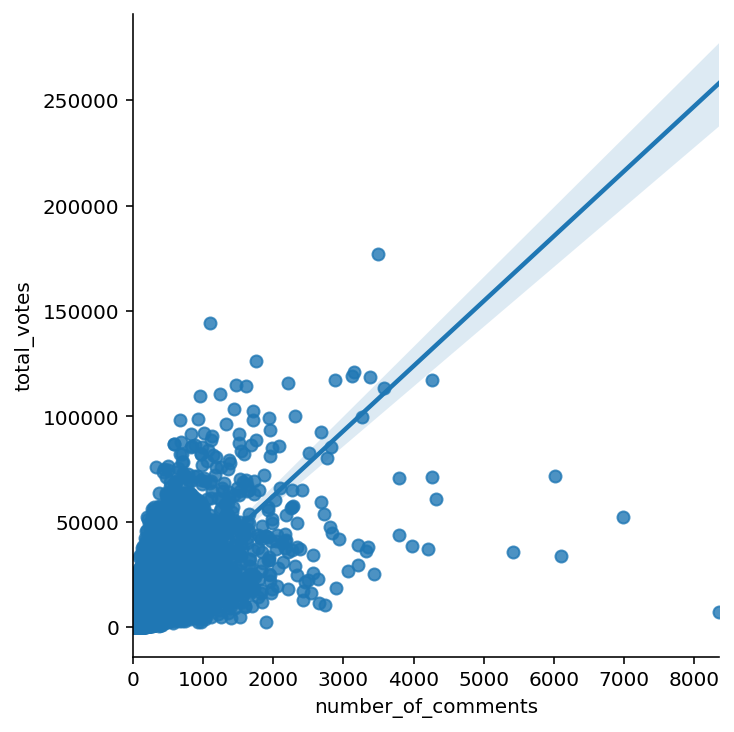

In [4]:
sns.lmplot(data=df, x="number_of_comments", y="total_votes")

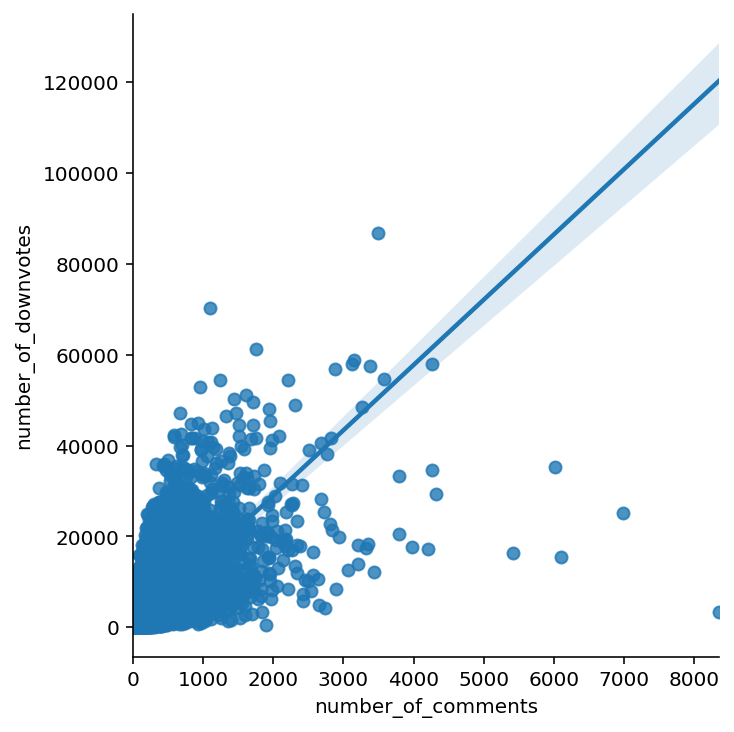

In [5]:
sns.lmplot(data=df, x="number_of_comments", y="number_of_downvotes")

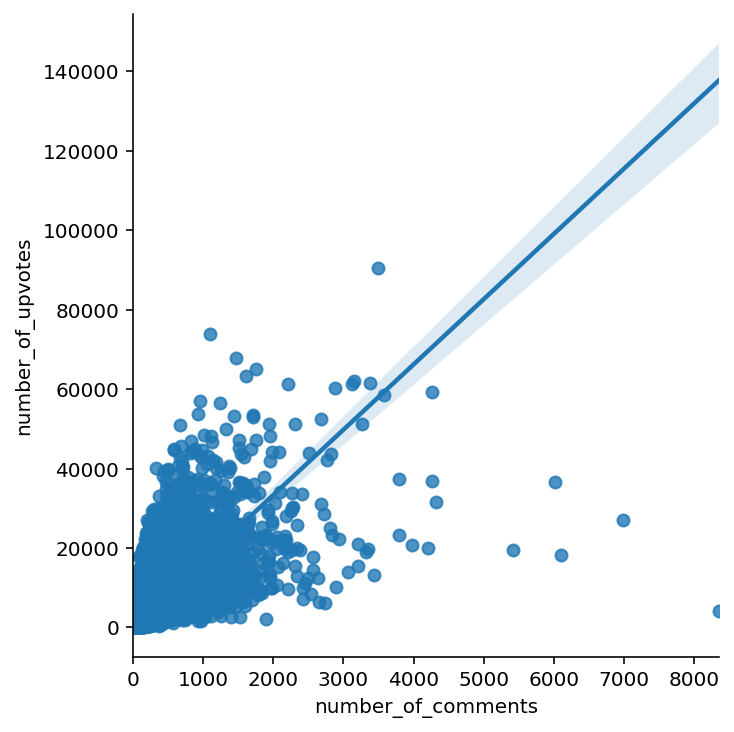

In [6]:
sns.lmplot(data=df, x="number_of_comments", y="number_of_upvotes")

In [7]:
df["unixtime"] = df["unixtime"].astype(int)
df["localtime"] = df["localtime"].astype(int)

In [8]:
df["readable_time"] = df["unixtime"].apply(lambda time: datetime.fromtimestamp(time))
df["readable_localtime"] = df["localtime"].apply(lambda time: datetime.fromtimestamp(time))

In [9]:
df["year_localtime"] = df["readable_localtime"].apply(lambda time: time.year)
df["month_localtime"] = df["readable_localtime"].apply(lambda time: time.month)
df["hour_localtime"] = df["readable_localtime"].apply(lambda time: time.hour)

In [10]:
df.head(10)

,#image_id,unixtime,rawtime,title,total_votes,reddit_id,number_of_upvotes,subreddit,number_of_downvotes,localtime,score,number_of_comments,username,readable_time,readable_localtime,year_localtime,month_localtime,hour_localtime
0,0,1333172439,2012-03-31T12:40:39.590113-07:00,And here's a downvote.,63470.0,rmqjs,32657.0,funny,30813.0,1333197639,1844.0,622.0,Animates_Everything,2012-03-30 22:40:39,2012-03-31 05:40:39,2012,3,5
1,0,1333178161,2012-03-31T14:16:01.093638-07:00,Expectation,35.0,rmun4,29.0,GifSound,6.0,1333203361,23.0,3.0,Gangsta_Raper,2012-03-31 00:16:01,2012-03-31 07:16:01,2012,3,7
2,0,1333199913,2012-03-31T20:18:33.192906-07:00,Downvote,41.0,rna86,32.0,GifSound,9.0,1333225113,23.0,0.0,Gangsta_Raper,2012-03-31 06:18:33,2012-03-31 13:18:33,2012,3,13
3,0,1333252330,2012-04-01T10:52:10-07:00,Every time I downvote something,10.0,ro7e4,6.0,GifSound,4.0,1333277530,2.0,0.0,Gangsta_Raper,2012-03-31 20:52:10,2012-04-01 03:52:10,2012,4,3
4,0,1333272954,2012-04-01T16:35:54.393381-07:00,Downvote &quot;Dies Irae&quot;,65.0,rooof,57.0,GifSound,8.0,1333298154,49.0,0.0,Gangsta_Raper,2012-04-01 02:35:54,2012-04-01 09:35:54,2012,4,9
5,0,1333761060,2012-04-07T08:11:00-07:00,"Demolished, every time you downvote someone",40.0,rxwjg,17.0,gifs,23.0,1333786260,-6.0,3.0,Hellothereawesome,2012-04-06 18:11:00,2012-04-07 01:11:00,2012,4,1
9,0,1339425291,2012-06-11T21:34:51.692933-07:00,Every LastAirBender post with a NSFW tag,20.0,uxf5q,9.0,pics,11.0,1339450491,-2.0,0.0,HadManySons,2012-06-11 07:34:51,2012-06-11 14:34:51,2012,6,14
10,0,1340008115,2012-06-18T15:28:35.800140-07:00,How I felt when i forgot to put &quot;spoiler&...,21.0,v8vl7,10.0,gifs,11.0,1340033315,-1.0,0.0,TraumaticASH,2012-06-18 01:28:35,2012-06-18 08:28:35,2012,6,8
11,0,1340020566,2012-06-18T18:56:06.440319-07:00,What r/AskReddit did to me when I asked someth...,271.0,v970d,210.0,gifs,61.0,1340045766,149.0,5.0,MidgetDance1337,2012-06-18 04:56:06,2012-06-18 11:56:06,2012,6,11
12,0,1340084902,2012-06-19T12:48:22.539790-07:00,My brother when he found my reddit account.,8494.0,vah9p,4612.0,funny,3882.0,1340110102,730.0,64.0,Pazzaz,2012-06-18 22:48:22,2012-06-19 05:48:22,2012,6,5


In [11]:
comments_year = df.groupby("year_localtime").count()["number_of_comments"]
comments_year

year_localtime
2008        9
2009       41
2010      139
2011    16789
2012    93063
2013     2002
Name: number_of_comments, dtype: int64

<AxesSubplot:xlabel='month_localtime', ylabel='number_of_comments'>

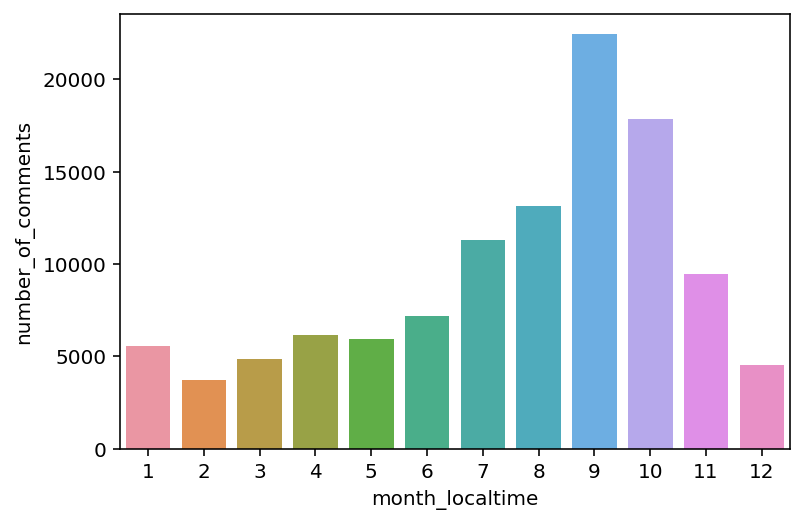

In [12]:
comments_month = df.groupby("month_localtime").count()["number_of_comments"]
sns.barplot(data=comments_month.reset_index(), x="month_localtime", y="number_of_comments")

<AxesSubplot:xlabel='hour_localtime', ylabel='number_of_comments'>

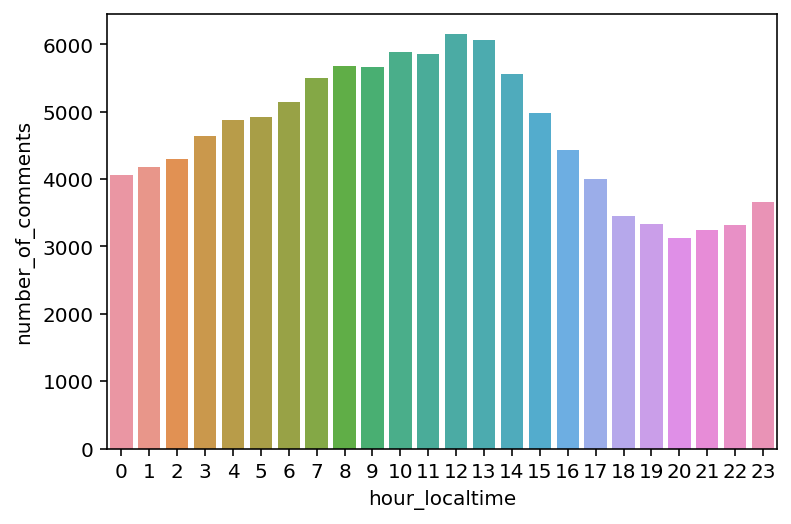

In [13]:
comments_hour = df.groupby("hour_localtime").count()["number_of_comments"]
sns.barplot(data=comments_hour.reset_index(), x="hour_localtime", y="number_of_comments")